<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>

<h1 style="text-align: center;">RFM Analysis</h1>

## Background and Context

### Company Scenario: Utilizing RFM Analysis for E-commerce XYZ

**Background:**
E-commerce XYZ wants to better understand customer behavior and improve retention using **RFM Analysis** (Recency, Frequency, Monetary). This analysis will help identify key customer segments and optimize marketing strategies.

**Key Stakeholder:**

**Chief Marketing Officer (CMO)**:
- **Role**: Develop targeted marketing strategies based on insights from RFM analysis.
- **Interest**: Increase customer retention, maximize campaign effectiveness, and improve overall ROI by focusing on high-value customer segments.

**Next Steps:**
1. **Personalized Campaigns**: Create tailored promotions for each customer segment, such as reactivation campaigns for "At Risk" customers and loyalty rewards for "Champions".
2. **Resource Allocation**: Use RFM data to allocate marketing budgets more efficiently, prioritizing high-value and high-potential segments.
3. **Customer Engagement**: Enhance engagement with customized messages and offers to boost loyalty and reduce churn.

With effective use of RFM Analysis, the CMO can drive customer retention, optimize marketing spend, and contribute to the overall growth of E-commerce XYZ.

---

## What is RFM?

RFM stands for:
- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much a customer spends on purchases.

The goal of RFM analysis is to segment customers into meaningful categories based on these three metrics.

## Dataset Overview

The dataset contains:
- `customer_id`: Unique identifier for each customer.
- `trans_date`: The date on which the transaction occurred.
- `tran_amount`: The amount spent on each transaction.


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 1. Data Preparation

First, load the dataset and inspect its structure.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['font.family'] = 'Poppins' 

In [2]:
df = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [4]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
head = df.head(5)
custcheck = df[df['customer_id'] == 'CS5295'].count()
display(head, custcheck, df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 124994 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  124994 non-null  object        
 1   trans_date   124994 non-null  datetime64[ns]
 2   tran_amount  124994 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ MB


,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


customer_id    25
trans_date     25
tran_amount    25
dtype: int64

None

In [7]:
df['trans_date'].min()

Timestamp('2011-05-16 00:00:00')

In [8]:
reference_date = df['trans_date'].max() + dt.timedelta(days=1)

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 2. Calculate RFM Metrics

### Recency:
Recency represents how recently a customer made a purchase. It is calculated by taking the difference between the current reference date (which is the latest transaction date in the dataset) and the most recent transaction date for each customer.

### Frequency:
Frequency measures how often a customer makes purchases. It is calculated by counting the number of transactions made by each customer.

### Monetary:
Monetary represents the total amount spent by a customer. It is calculated by summing the transaction amounts for each customer.

At this stage, we group the dataset by `customer_id` and calculate the Recency, Frequency, and Monetary values for each customer.


In [9]:
# Aggregate the data with descriptive column names
rfm_df = df.groupby('customer_id').agg(
    Last_Purchase_Date=('trans_date', 'max'),  # Get the date of the most recent transaction
    Frequency=('trans_date', 'count'),         # Count the total number of transactions
    Monetary=('tran_amount', 'sum')            # Sum the total amount spent
).reset_index()

# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days

# Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary']]

rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,CS1112,62,15,1012
1,CS1113,36,20,1490
2,CS1114,33,19,1432
3,CS1115,12,22,1659
4,CS1116,204,13,857


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 3. RFM Scoring

Once we have the RFM metrics, we assign a score between 1 and 5 for each metric. The scores are based on quintiles:
- **Recency**: Lower recency (more recent purchase) gets a higher score.
- **Frequency**: Higher frequency (more purchases) gets a higher score.
- **Monetary**: Higher monetary value (more money spent) gets a higher score.

These scores are then combined to create an RFM score for each customer.

In [10]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [11]:
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,CS1112,62,15,1012,3,2,2
1,CS1113,36,20,1490,4,4,4
2,CS1114,33,19,1432,4,3,4
3,CS1115,12,22,1659,5,4,5
4,CS1116,204,13,857,1,1,2
...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,2,1,1
6885,CS8997,262,14,543,1,2,1
6886,CS8998,85,13,624,2,1,1
6887,CS8999,258,12,383,1,1,1


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 4. Combine RFM Scores

The next step involves combining the Recency, Frequency, and Monetary scores into a single RFM score. This score is generated by concatenating the Recency, Frequency, and Monetary scores for each customer. The resulting RFM score gives a comprehensive view of a customer’s behavior in terms of their engagement and value.

In [12]:
rfm_df['RFM_Score'] = rfm_df.R_Score.astype(str) + rfm_df.F_Score.astype(str) + rfm_df.M_Score.astype(str)

rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CS1112,62,15,1012,3,2,2,322
1,CS1113,36,20,1490,4,4,4,444
2,CS1114,33,19,1432,4,3,4,434
3,CS1115,12,22,1659,5,4,5,545
4,CS1116,204,13,857,1,1,2,112
...,...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,2,1,1,211
6885,CS8997,262,14,543,1,2,1,121
6886,CS8998,85,13,624,2,1,1,211
6887,CS8999,258,12,383,1,1,1,111


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 5. RFM Segmentation

Pada langkah ini, kita menggunakan skor RFM yang dikombinasikan untuk mengelompokkan pelanggan ke dalam berbagai segmen. Setiap segmen mewakili perilaku pelanggan yang berbeda berdasarkan nilai recency, frequency, dan monetary.

Berikut adalah segmen-segmen umum yang digunakan dalam analisis RFM:

- **Hibernating**: Pelanggan yang sudah lama tidak melakukan pembelian dan memiliki frekuensi serta nilai monetary yang rendah.
- **At Risk**: Pelanggan yang sebelumnya aktif tetapi sudah lama tidak melakukan pembelian, menunjukkan potensi untuk churn atau hilang.
- **Cannot Lose Them**: Pelanggan yang memiliki nilai monetary tinggi tetapi frekuensi pembelian rendah dan sudah lama tidak membeli, sehingga perlu perhatian khusus agar tidak hilang.
- **About to Sleep**: Pelanggan dengan recency dan frekuensi yang sedang, namun berpotensi untuk berhenti bertransaksi jika tidak diaktifkan kembali.
- **Need Attention**: Pelanggan dengan potensi yang baik, namun membutuhkan perhatian dan engagement lebih untuk meningkatkan aktivitas mereka.
- **Promising**: Pelanggan baru yang memiliki potensi untuk menjadi loyal atau bernilai tinggi.
- **Champion**: Pelanggan terbaik yang sering membeli, baru-baru ini melakukan pembelian, dan memiliki pengeluaran yang tinggi.
- **Loyal Customer**: Pelanggan setia yang sering melakukan pembelian dan memiliki nilai monetary yang tinggi.
- **Potential Loyalist**: Pelanggan yang hampir menjadi pelanggan setia tetapi belum sepenuhnya, mungkin dengan frekuensi tinggi namun nilai monetary masih menengah.
- **New Customers**: Pelanggan yang baru saja melakukan pembelian dan mungkin masih dalam tahap eksplorasi produk atau brand.
- **Lost**: Pelanggan yang sudah lama tidak membeli dengan frekuensi dan monetary yang rendah, cenderung hilang atau churn.

In [13]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'].astype(int))
rfm_df.head(5)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,CS1112,62,15,1012,3,2,2,322,Hibernating
1,CS1113,36,20,1490,4,4,4,444,Loyal Customer
2,CS1114,33,19,1432,4,3,4,434,Need Attention
3,CS1115,12,22,1659,5,4,5,545,Champion
4,CS1116,204,13,857,1,1,2,112,Lost


In [14]:
pd.DataFrame(rfm_df['Customer Segment'].value_counts())

,count
Customer Segment,
Hibernating,1229
Champion,1029
At Risk,810
Potential Loyalist,800
Loyal Customer,776
New Customer,727
Lost,566
Promising,275
Cannot Lose Them,254


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 6. Analyze the Segments

Once customers are segmented, we analyze each segment to understand their behavior:
- **Recency**: How recently customers in each segment have purchased.
- **Frequency**: How often customers in each segment make purchases.
- **Monetary**: How much customers in each segment spend.

This analysis provides insights into which customer groups need more attention and which are high-value, helping businesses tailor their marketing strategies.

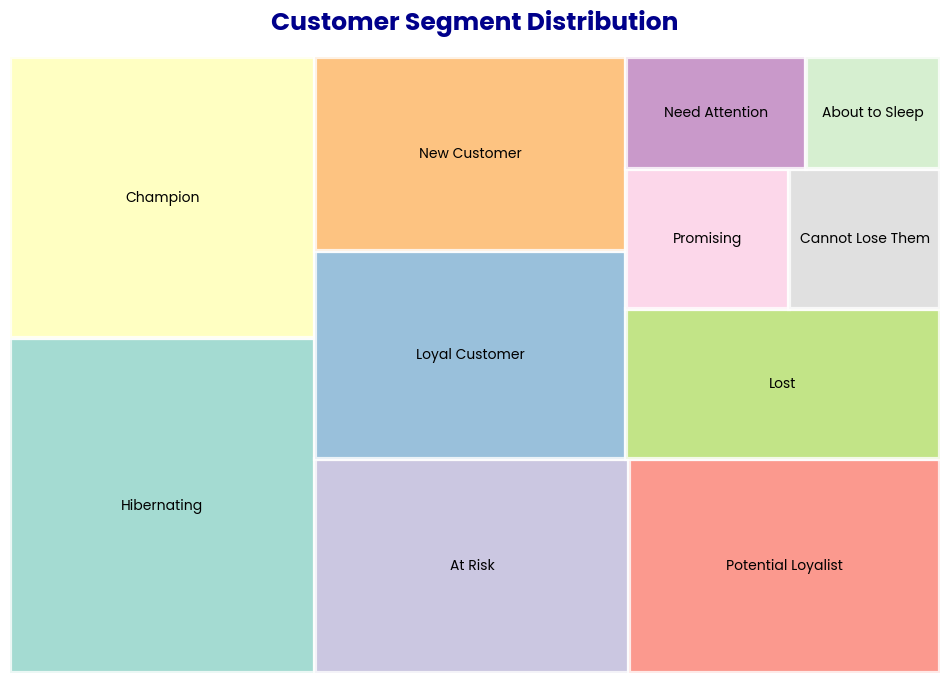

In [15]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

colors = sns.color_palette('Set3', len(segment_counts))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Customer Segment'],
    color=colors,  
    alpha=0.8,  
    edgecolor='white',  
    linewidth=3 
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

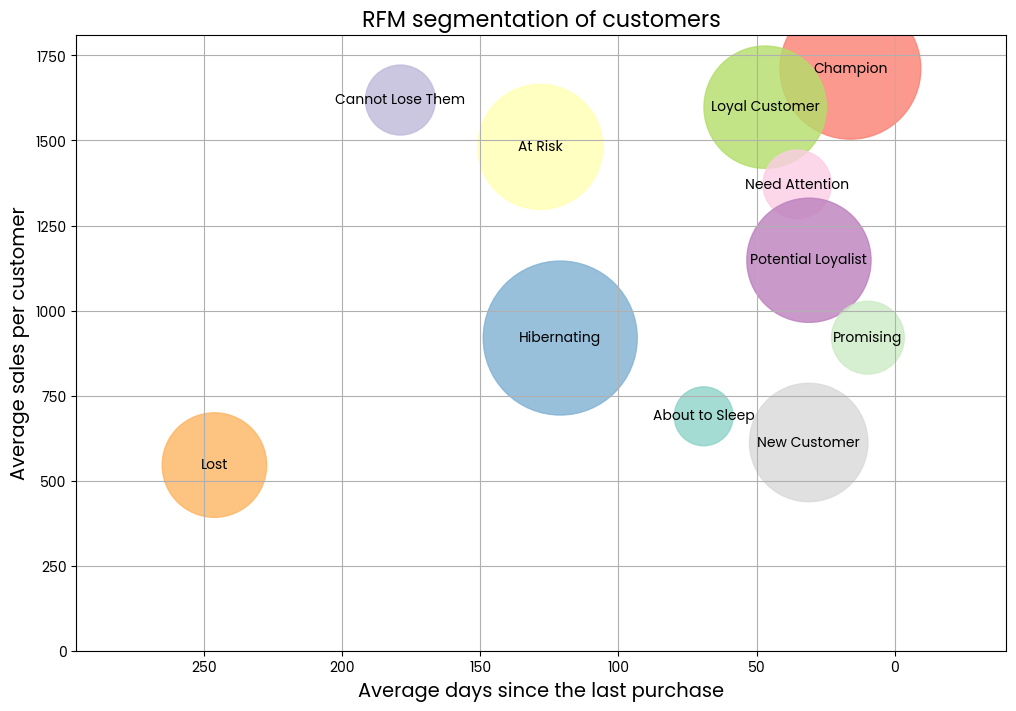

In [20]:
df = pd.read_csv("rfm.csv")

segment_summary = df.groupby('Customer Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('customer_id', 'count')
).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    segment_summary['avg_days_since_purchase'],
    segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 10,  
    c=sns.color_palette('Set3', len(segment_summary)),  
    alpha=0.8  
)

# Labeling the axes and title
plt.xlabel('Average days since the last purchase', fontsize=14)
plt.ylabel('Average sales per customer', fontsize=14)
plt.title('RFM segmentation of customers', fontsize=16)
plt.grid(True)

for i, text in enumerate(segment_summary['Customer Segment']):
    plt.annotate(
        text,
        (segment_summary['avg_days_since_purchase'][i], segment_summary['avg_sales_per_customer'][i]),
        ha='center',
        va='center'
    )

plt.gca().invert_xaxis()

plt.xlim(segment_summary['avg_days_since_purchase'].max() + 50, segment_summary['avg_days_since_purchase'].min() - 50)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 100)

plt.show()


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
Export Segmented Dataset

In [17]:
rfm_df.to_csv('rfm.csv', index=False)

In [18]:
segment_summary.to_csv('segment_summary.csv', index=False)

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## Conclusion

RFM analysis helps businesses understand their customer base by categorizing customers into distinct segments based on recency, frequency, and monetary value. This segmentation can be used to:
- Identify high-value customers and nurture relationships with them.
- Prevent at-risk customers from churning.
- Engage new and promising customers to boost loyalty and spending.
- Optimize marketing efforts by focusing on specific customer behaviors and needs.

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>

## RFM Segmentation and Recommendations

### 1. **Champions**

#### Characteristics:
- **High Recency**: They have made a purchase very recently.
- **High Frequency**: They shop frequently.
- **High Monetary**: They spend a lot and are the most valuable customers.

#### Recommendation:
- **Retain and reward them** with VIP benefits, exclusive offers, or early access to new products. These customers are your biggest advocates, so keep them engaged with personalized offers, referral programs, and unique experiences. Ensure they feel appreciated with excellent customer service and continue to strengthen your relationship with them.

---

### 2. **Loyal Customers**

#### Characteristics:
- **High Recency**: They have recently made a purchase.
- **High Frequency**: They shop regularly.
- **Medium/High Monetary**: They spend a good amount and show loyalty to the brand.

#### Recommendation:
- **Strengthen the relationship** by offering loyalty programs, exclusive deals, or discounts for their next purchase. Encourage them to refer friends or family through referral programs and reward them with additional perks for every successful referral.

---

### 3. **Potential Loyalists**

#### Characteristics:
- **High Recency**: They have made a recent purchase.
- **Medium Frequency**: They are starting to show a pattern of more frequent purchases.
- **Medium Monetary**: They spend a decent amount and have the potential to become loyal customers.

#### Recommendation:
- **Encourage them to become loyal customers** by offering additional incentives like VIP membership or attractive loyalty programs. Send exclusive offers or discounts for their next purchase to increase their engagement and foster loyalty.

---

### 4. **New Customers**

#### Characteristics:
- **High Recency**: They have just made their first purchase.
- **Low Frequency**: They haven’t had the chance to make repeat purchases yet.
- **Low/Medium Monetary**: Their initial spending varies as they are still exploring the brand.

#### Recommendation:
- **Build a strong initial relationship** by providing an excellent post-purchase experience. Send a welcome email, personalized product recommendations, or special offers for their second purchase. Make them feel valued and appreciated so they come back for more.

---

### 5. **Promising**

#### Characteristics:
- **High Recency**: They have made a recent purchase.
- **Medium Frequency**: They show signs of becoming regular shoppers.
- **Medium Monetary**: They are starting to spend more and show potential to become high-value customers.

#### Recommendation:
- **Maintain momentum** by providing special offers like discounts for their next purchase or loyalty rewards for specific transactions. Keep them engaged with product updates, promotions, or recommendations that match their interests.

---

### 6. **Need Attention**

#### Characteristics:
- **Medium Recency**: They made a purchase not long ago.
- **Medium Frequency**: They shop occasionally but not consistently.
- **Medium Monetary**: Their spending is moderate but could increase.

#### Recommendation:
- **Increase their engagement** by offering loyalty programs that provide points or rewards for each purchase. Give them special attention with tailored offers, and make sure to follow up with messages or emails after their purchases to encourage them to shop again.

---

### 7. **Cannot Lose Them**

#### Characteristics:
- **Low Recency**: They haven’t made a purchase in a while.
- **Low Frequency**: They don’t shop often.
- **High Monetary**: They spend a lot when they do purchase.

#### Recommendation:
- **Retain these customers at all costs**. Provide them with exclusive services, special discounts, or even personal calls from a company representative. Offer compelling incentives to bring them back, like substantial discount vouchers or special gifts for their next purchase.

---

### 8. **About to Sleep**

#### Characteristics:
- **Medium Recency**: They made a purchase not too long ago but have become inactive.
- **Low Frequency**: They don’t shop often.
- **Low Monetary**: Their spending is low.

#### Recommendation:
- **Re-engage them with special offers** that encourage them to make another purchase. Offer discounts or promotions for their next purchase or send reminders about products they viewed or bought. If they still don’t respond, consider reducing marketing efforts for this segment.

---

### 9. **At Risk**

#### Characteristics:
- **Low Recency**: They haven’t made a purchase recently.
- **Medium/High Frequency**: They used to shop frequently but have stopped.
- **Medium Monetary**: They have spent a good amount but are currently inactive.

#### Recommendation:
- **Prevent them from leaving** by offering exclusive deals or significant discounts to win them back. Send personalized messages reminding them of the benefits of shopping with your brand. If possible, provide additional incentives for making a purchase soon.

---

### 10. **Hibernating**

#### Characteristics:
- **Low Recency**: They haven’t made a purchase in a very long time.
- **Low Frequency**: They rarely make purchases.
- **Low Monetary**: Their spending is minimal.

#### Recommendation:
- **Make a last attempt to win them back** with highly attractive offers like big discounts or free products. If they do not respond, consider removing them from active marketing lists to reduce ineffective marketing costs.

---

### 11. **Lost**

#### Characteristics:
- **Low Recency**: They haven’t made a purchase in a very long time.
- **Low Frequency**: They rarely make purchases.
- **Low Monetary**: They spend very little.

#### Recommendation:
- **Focus on a final attempt to recover them** if possible. If they don’t respond, reduce marketing efforts for this segment and focus on more promising customers. Consider offering substantial incentives as a last effort to bring them back.

<style>
    h2, h3, p {
        font-family: 'Poppins', sans-serif;
    }
</style>

## 🎉 Thank You! 🎉

<p style="font-size: 18px;">
Thank you for reading and exploring this RFM analysis! 🙏 I hope you gained valuable insights from the analysis and data visualizations presented. If you have any feedback, questions, or ideas you'd like to discuss further, please feel free to reach out to me.
</p>

💡 <b>Remember:</b> Data is the key to understanding customers better. With the right analysis, we can make smarter decisions and build stronger relationships with our customers.

### See You in the Next Analysis! 📊
